Подключение необходимых модулей и загрузка выборки

In [ ]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn. metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm.notebook import tqdm_notebook
from time import sleep
os.chdir('/content/drive/MyDrive/Colab Notebooks/NIR')

In [ ]:
df=pd.read_csv("data_capec_multilabel_ishodn.csv", sep=',', low_memory=False)

In [ ]:
df.pop('248 - Command Injection')

0         0
1         0
2         0
3         0
4         0
         ..
907810    0
907811    0
907812    0
907813    0
907814    0
Name: 248 - Command Injection, Length: 907815, dtype: int64

In [ ]:
df.shape

(907815, 37)

In [ ]:
display(df)

,timestamp,src_ip,src_port,dst_ip,dst_port,request_http_method,request_http_request,request_http_protocol,request_user_agent,request_referer,...,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling
0,17/Jul/2020:12:23:34 +0100,172.26.0.1,55894.0,172.26.0.4,80.0,GET,/,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3...,NaN,...,0,0,0,0,0,0,0,0,0,0
1,17/Jul/2020:12:23:41 +0100,172.26.0.1,55897.0,172.26.0.4,80.0,GET,/blog/index.php/2020/04/04/voluptatum-reprehen...,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,NaN,...,0,0,0,0,0,0,0,0,0,0
2,17/Jul/2020:12:23:51 +0100,172.26.0.1,55901.0,172.26.0.4,80.0,GET,/blog/xmlrpc.php?rsd,HTTP/1.1,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,NaN,...,0,0,0,0,0,0,0,0,0,0
3,17/Jul/2020:12:23:51 +0100,172.26.0.1,55902.0,172.26.0.4,80.0,GET,/,HTTP/1.1,Mozilla/5.0 (Linux; Android 4.2.2; SM-T110 Bui...,NaN,...,0,0,0,0,0,0,0,0,0,0
4,17/Jul/2020:12:23:58 +0100,172.26.0.1,55903.0,172.26.0.4,80.0,GET,/blog/index.php/2020/04/04/nihil-tenetur-et-ad...,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907810,29/Jul/2020:22:26:31 +0100,172.26.0.1,53171.0,172.26.0.4,80.0,GET,/,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,NaN,...,0,0,0,0,0,0,0,0,0,0
907811,29/Jul/2020:22:27:26 +0100,172.26.0.1,53179.0,172.26.0.4,80.0,GET,/,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,NaN,...,0,0,0,0,0,0,0,0,0,0
907812,29/Jul/2020:22:27:49 +0100,172.26.0.1,53185.0,172.26.0.4,80.0,GET,/,HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,NaN,...,0,0,0,0,0,0,0,0,0,0
907813,29/Jul/2020:22:28:28 +0100,172.26.0.1,53192.0,172.26.0.4,80.0,GET,/,HTTP/1.1,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
spis_column = df.columns.tolist()
print(spis_column)

['timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'request_http_method', 'request_http_request', 'request_http_protocol', 'request_user_agent', 'request_referer', 'request_host', 'request_origin', 'request_cookie', 'request_content_type', 'request_accept', 'request_accept_language', 'request_accept_encoding', 'request_do_not_track', 'request_connection', 'request_body', 'response_http_protocol', 'response_http_status_code', 'response_http_status_message', 'response_content_length', '000 - Normal', '272 - Protocol Manipulation', '242 - Code Injection', '88 - OS Command Injection', '126 - Path Traversal', '66 - SQL Injection', '16 - Dictionary-based Password Attack', '310 - Scanning for Vulnerable Software', '153 - Input Data Manipulation', '274 - HTTP Verb Tampering', '194 - Fake the Source of Data', '34 - HTTP Response Splitting', '33 - HTTP Request Smuggling']


In [ ]:
targ_names = spis_column[24:]
print(targ_names)

['000 - Normal', '272 - Protocol Manipulation', '242 - Code Injection', '88 - OS Command Injection', '126 - Path Traversal', '66 - SQL Injection', '16 - Dictionary-based Password Attack', '310 - Scanning for Vulnerable Software', '153 - Input Data Manipulation', '274 - HTTP Verb Tampering', '194 - Fake the Source of Data', '34 - HTTP Response Splitting', '33 - HTTP Request Smuggling']


Предварительная оцифровка данных полей веб-запроса

In [ ]:
for i in tqdm_notebook(range(df.shape[0])):
  for j in spis_column[:24]:
    value = df[j][i]
    if pd.isnull(value) == True:
      value = 'N'
      df.at[i, j] = str(value)
    else:
      value_1 = str(value).lower()
      coding_str = re.sub('[a-z]', 'A', value_1)
      coding_str = re.sub('[0-9]', 'N', coding_str)
      df.at[i, j] = coding_str
  #print('\r', i, end = '\r')

  0%|          | 0/907815 [00:00<?, ?it/s]

In [ ]:
df_new = pd.DataFrame()
display(df_new)

""


In [ ]:
display(df)

,timestamp,src_ip,src_port,dst_ip,dst_port,request_http_method,request_http_request,request_http_protocol,request_user_agent,request_referer,...,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling
0,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/,AAAA/N.N,AAAAAAA/N.N (AAAAAAAAA; AAAAA AAA AA A NN_NN_N...,N,...,0,0,0,0,0,0,0,0,0,0
1,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/AAAA/AAAAA.AAA/NNNN/NN/NN/AAAAAAAAAA-AAAAAAAA...,AAAA/N.N,AAAAAAA/N.N (AAAAAAAAA; AAAAA AAA AA A NN.N; A...,N,...,0,0,0,0,0,0,0,0,0,0
2,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/AAAA/AAAAAA.AAA?AAA,AAAA/N.N,AAAAAAA/N.N (AAAAAAAAAA; AAAA N.N; AAAAAAA AA ...,N,...,0,0,0,0,0,0,0,0,0,0
3,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/,AAAA/N.N,AAAAAAA/N.N (AAAAA; AAAAAAA N.N.N; AA-ANNN AAA...,N,...,0,0,0,0,0,0,0,0,0,0
4,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/AAAA/AAAAA.AAA/NNNN/NN/NN/AAAAA-AAAAAAA-AA-AA...,AAAA/N.N,AAAAAAA/N.N (AAAAAAAAA; AAAAA AAA AA A NN_NN_N...,N,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907810,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/,AAAA/N.N,AAAAAAA/N.N (AAAAAAAAA; AAAAA AAA AA A NN_N_N)...,N,...,0,0,0,0,0,0,0,0,0,0
907811,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/,AAAA/N.N,AAAAAAA/N.N (AAAAAAAAA; AAAAA AAA AA A NN_N_N)...,N,...,0,0,0,0,0,0,0,0,0,0
907812,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/,AAAA/N.N,AAAAAAA/N.N (AAAAAAAAA; AAAAA AAA AA A NN.N; A...,N,...,0,0,0,0,0,0,0,0,0,0
907813,NN/AAA/NNNN:NN:NN:NN +NNNN,NNN.NN.N.N,NNNNN.N,NNN.NN.N.N,NN.N,AAA,/,AAAA/N.N,AAAAAAA/N.N (AAAAAAA AA N.N; AAANN) AAAAAAAAAA...,N,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in tqdm_notebook(range(0, 100001), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new.at[i, j+'_A'] = col_of_character
    df_new.at[i, j+'_N'] = col_of_number
    df_new.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new)
#df_new.to_csv('data_capec_multilabel.csv', index = False)

In [ ]:
for i in tqdm_notebook(range(100001, 200001), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new.at[i, j+'_A'] = col_of_character
    df_new.at[i, j+'_N'] = col_of_number
    df_new.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new)
#df_new.to_csv('data_capec_multilabel.csv', index = False)

In [ ]:
for i in tqdm_notebook(range(200001, 300001), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new.at[i, j+'_A'] = col_of_character
    df_new.at[i, j+'_N'] = col_of_number
    df_new.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new)
df_new.to_csv('data_capec_multilabel.csv', index = False)

In [ ]:
df_new.to_csv('/content/drive/MyDrive/Colab Notebooks/NIR/data_capec_multilabel_0_300000.csv', index = False)

In [ ]:
df_new_300001_400001 = pd.DataFrame()
display(df_new_300001_400001)
for i in tqdm_notebook(range(300001, 400001), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new_300001_400001.at[i, j+'_A'] = col_of_character
    df_new_300001_400001.at[i, j+'_N'] = col_of_number
    df_new_300001_400001.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new_300001_400001)
df_new_300001_400001.to_csv('/content/drive/MyDrive/Colab Notebooks/NIR/data_capec_multilabel_300001_400000.csv', index = False)

In [ ]:
df_new_0_300000 = pd.read_csv("data_capec_multilabel_0_300000.csv", sep=',', low_memory=False)

In [ ]:
df_new_300001_400000 = pd.read_csv("data_capec_multilabel_300001_400000.csv", sep=',', low_memory=False)

In [ ]:
df_merged = pd.concat([df_new_0_300000, df_new_300001_400000], axis = 0, ignore_index=True)

In [ ]:
display(df_merged)

,timestamp_A,timestamp_N,timestamp_S,src_ip_A,src_ip_N,src_ip_S,src_port_A,src_port_N,src_port_S,dst_ip_A,...,response_http_protocol_S,response_http_status_code_A,response_http_status_code_N,response_http_status_code_S,response_http_status_message_A,response_http_status_message_N,response_http_status_message_S,response_content_length_A,response_content_length_N,response_content_length_S
0,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
1,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
2,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,4.0,1.0
3,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
4,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399996,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
399997,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
399998,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
399999,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,7.0,1.0


In [ ]:
df_new_400001_500000 = pd.DataFrame()

for i in tqdm_notebook(range(400001, 500001), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new_400001_500000.at[i, j+'_A'] = col_of_character
    df_new_400001_500000.at[i, j+'_N'] = col_of_number
    df_new_400001_500000.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new_400001_500000)
df_new_400001_500000.to_csv('/content/drive/MyDrive/Colab Notebooks/NIR/data_capec_multilabel_400001_500000.csv', index = False)

Convert data :   0%|          | 0/100000 [00:00<?, ?it/s]

,timestamp_A,timestamp_N,timestamp_S,src_ip_A,src_ip_N,src_ip_S,src_port_A,src_port_N,src_port_S,dst_ip_A,...,response_http_protocol_S,response_http_status_code_A,response_http_status_code_N,response_http_status_code_S,response_http_status_message_A,response_http_status_message_N,response_http_status_message_S,response_content_length_A,response_content_length_N,response_content_length_S
400001,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
400002,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
400003,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
400004,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
400005,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499996,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
499997,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0
499998,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,6.0,1.0
499999,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,8.0,0.0,0.0,0.0,4.0,1.0


In [ ]:
df_merged = pd.concat([df_merged, df_new_400001_500000], axis = 0, ignore_index=True)

In [ ]:
df_new_500001_600000 = pd.DataFrame()

for i in tqdm_notebook(range(500001, 600001), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new_500001_600000.at[i, j+'_A'] = col_of_character
    df_new_500001_600000.at[i, j+'_N'] = col_of_number
    df_new_500001_600000.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new_500001_600000)
df_new_500001_600000.to_csv('/content/drive/MyDrive/Colab Notebooks/NIR/data_capec_multilabel_500001_600000.csv', index = False)

In [ ]:
df_merged = pd.concat([df_merged, df_new_500001_600000], axis = 0, ignore_index=True)
display(df_merged)

In [ ]:
df_new_600001_700000 = pd.DataFrame()

for i in tqdm_notebook(range(600001, 700001), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new_600001_700000.at[i, j+'_A'] = col_of_character
    df_new_600001_700000.at[i, j+'_N'] = col_of_number
    df_new_600001_700000.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new_600001_700000)
df_new_600001_700000.to_csv('/content/drive/MyDrive/Colab Notebooks/NIR/data_capec_multilabel_600001_700000.csv', index = False)

In [ ]:
df_merged = pd.concat([df_merged, df_new_600001_700000], axis = 0, ignore_index=True)
display(df_merged)

In [ ]:
df_new_700001_800000 = pd.DataFrame()

for i in tqdm_notebook(range(700001, 800001), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new_700001_800000.at[i, j+'_A'] = col_of_character
    df_new_700001_800000.at[i, j+'_N'] = col_of_number
    df_new_700001_800000.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new_700001_800000)
df_new_700001_800000.to_csv('/content/drive/MyDrive/Colab Notebooks/NIR/data_capec_multilabel_700001_800000.csv', index = False)

In [ ]:
df_merged = pd.concat([df_merged, df_new_700001_800000], axis = 0, ignore_index=True)
display(df_merged)

In [ ]:
df_new_800001_907814 = pd.DataFrame()

for i in tqdm_notebook(range(800001, 907815), desc = 'Convert data '):
  for j in spis_column[:24]:
    value = df[j][i]
    s = "|\=@№'`~^.,:;!_*-+()?></#%&"
    col_of_character = 0
    col_of_number = 0
    col_of_symb = 0
    for symb in value:
      if symb == 'A':
        col_of_character+=1
      elif symb == 'N':
        col_of_number+=1
      elif symb in s:
        col_of_symb+=1
    df_new_800001_907814.at[i, j+'_A'] = col_of_character
    df_new_800001_907814.at[i, j+'_N'] = col_of_number
    df_new_800001_907814.at[i, j+'_S'] = col_of_symb
    #col = str(col_of_character) + str(col_of_number) + str(col_of_symb)
    #df_new.at[i, j] = col
  #print('\r', i, end = '\r')
display(df_new_800001_907814)
df_new_800001_907814.to_csv('/content/drive/MyDrive/Colab Notebooks/NIR/data_capec_multilabel_800001_907814.csv', index = False)

In [ ]:
df_merged = pd.concat([df_merged, df_new_800001_907814], axis = 0, ignore_index=True)
display(df_merged)

In [ ]:
display(df_merged)

,timestamp_A,timestamp_N,timestamp_S,src_ip_A,src_ip_N,src_ip_S,src_port_A,src_port_N,src_port_S,dst_ip_A,...,response_http_protocol_S,response_http_status_code_A,response_http_status_code_N,response_http_status_code_S,response_http_status_message_A,response_http_status_message_N,response_http_status_message_S,response_content_length_A,response_content_length_N,response_content_length_S
0,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
1,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
2,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,4.0,1.0
3,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
4,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907810,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
907811,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
907812,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
907813,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0


In [ ]:

df2 = df.loc[:, "000 - Normal":"33 - HTTP Request Smuggling"]
display(df2)

,000 - Normal,272 - Protocol Manipulation,242 - Code Injection,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907810,1,0,0,0,0,0,0,0,0,0,0,0,0
907811,1,0,0,0,0,0,0,0,0,0,0,0,0
907812,1,0,0,0,0,0,0,0,0,0,0,0,0
907813,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_merged = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NIR/df_merged.csv", sep=',', low_memory=False)
display(df_merged)

,timestamp_A,timestamp_N,timestamp_S,src_ip_A,src_ip_N,src_ip_S,src_port_A,src_port_N,src_port_S,dst_ip_A,...,response_http_protocol_S,response_http_status_code_A,response_http_status_code_N,response_http_status_code_S,response_http_status_message_A,response_http_status_message_N,response_http_status_message_S,response_content_length_A,response_content_length_N,response_content_length_S
0,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
1,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
2,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,4.0,1.0
3,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
4,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907810,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
907811,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
907812,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0
907813,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,2.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,1.0


In [ ]:
df_merged = pd.concat([df_merged, df2], axis = 1)
display(df_merged)

,timestamp_A,timestamp_N,timestamp_S,src_ip_A,src_ip_N,src_ip_S,src_port_A,src_port_N,src_port_S,dst_ip_A,...,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling
0,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907810,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
907811,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
907812,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
907813,3.0,16.0,6.0,0.0,7.0,3.0,0.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
spis_column_merged = df_merged.columns.tolist()
print(spis_column_merged)

['timestamp_A', 'timestamp_N', 'timestamp_S', 'src_ip_A', 'src_ip_N', 'src_ip_S', 'src_port_A', 'src_port_N', 'src_port_S', 'dst_ip_A', 'dst_ip_N', 'dst_ip_S', 'dst_port_A', 'dst_port_N', 'dst_port_S', 'request_http_method_A', 'request_http_method_N', 'request_http_method_S', 'request_http_request_A', 'request_http_request_N', 'request_http_request_S', 'request_http_protocol_A', 'request_http_protocol_N', 'request_http_protocol_S', 'request_user_agent_A', 'request_user_agent_N', 'request_user_agent_S', 'request_referer_A', 'request_referer_N', 'request_referer_S', 'request_host_A', 'request_host_N', 'request_host_S', 'request_origin_A', 'request_origin_N', 'request_origin_S', 'request_cookie_A', 'request_cookie_N', 'request_cookie_S', 'request_content_type_A', 'request_content_type_N', 'request_content_type_S', 'request_accept_A', 'request_accept_N', 'request_accept_S', 'request_accept_language_A', 'request_accept_language_N', 'request_accept_language_S', 'request_accept_encoding_A', '

In [ ]:
df_merged = df_merged.drop(columns = ['timestamp_A', 'timestamp_N', 'timestamp_S', 'src_ip_A', 'src_ip_N', 'src_ip_S', 'src_port_A', 'src_port_N', 'src_port_S', 'dst_ip_A', 'dst_ip_N', 'dst_ip_S', 'dst_port_A', 'dst_port_N', 'dst_port_S', 'request_origin_A', 'request_origin_N', 'request_origin_S', 'request_http_protocol_A', 'request_http_protocol_N', 'request_http_protocol_S', 'request_do_not_track_A', 'request_do_not_track_N', 'request_do_not_track_S', 'response_http_status_code_A', 'response_http_status_code_N', 'response_http_status_code_S', 'response_http_protocol_A', 'response_http_protocol_N', 'response_http_protocol_S'])

In [ ]:
spis_column_merged = df_merged.columns.tolist()
print(spis_column_merged)

['request_http_method_A', 'request_http_method_N', 'request_http_method_S', 'request_http_request_A', 'request_http_request_N', 'request_http_request_S', 'request_user_agent_A', 'request_user_agent_N', 'request_user_agent_S', 'request_referer_A', 'request_referer_N', 'request_referer_S', 'request_host_A', 'request_host_N', 'request_host_S', 'request_cookie_A', 'request_cookie_N', 'request_cookie_S', 'request_content_type_A', 'request_content_type_N', 'request_content_type_S', 'request_accept_A', 'request_accept_N', 'request_accept_S', 'request_accept_language_A', 'request_accept_language_N', 'request_accept_language_S', 'request_accept_encoding_A', 'request_accept_encoding_N', 'request_accept_encoding_S', 'request_connection_A', 'request_connection_N', 'request_connection_S', 'request_body_A', 'request_body_N', 'request_body_S', 'response_http_status_message_A', 'response_http_status_message_N', 'response_http_status_message_S', 'response_content_length_A', 'response_content_length_N',

Разделение набора данных на обучающую и тестовую, обучение классификаторов

In [ ]:
X = df_merged[spis_column_merged[:42]]
Y = df_merged[spis_column_merged[42:]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 42)

In [ ]:
print('Shape of X train:' , X_train.shape)
print('Shape of y train:' , Y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of Y test:', Y_test.shape)

Shape of X train: (590079, 42)
Shape of y train: (590079, 13)
Shape of X test: (317736, 42)
Shape of Y test: (317736, 13)


In [ ]:
targ_names_merged = spis_column_merged[42:]
print(targ_names_merged)

['000 - Normal', '272 - Protocol Manipulation', '242 - Code Injection', '88 - OS Command Injection', '126 - Path Traversal', '66 - SQL Injection', '16 - Dictionary-based Password Attack', '310 - Scanning for Vulnerable Software', '153 - Input Data Manipulation', '274 - HTTP Verb Tampering', '194 - Fake the Source of Data', '34 - HTTP Response Splitting', '33 - HTTP Request Smuggling']


In [ ]:
# Стандартизация данных
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [ ]:
# Модель Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_scaled, Y_train)
y_pred = clf.predict(X_test_scaled)

In [ ]:
print(classification_report(Y_test, y_pred, target_names = targ_names_merged))

                                        precision    recall  f1-score   support

                          000 - Normal       0.97      0.97      0.97    184124
           272 - Protocol Manipulation       0.85      0.63      0.73      3135
                  242 - Code Injection       1.00      0.96      0.98      5552
             88 - OS Command Injection       0.93      0.83      0.88      2565
                  126 - Path Traversal       0.98      0.95      0.97      7190
                    66 - SQL Injection       0.96      0.96      0.96     87743
 16 - Dictionary-based Password Attack       1.00      1.00      1.00       649
310 - Scanning for Vulnerable Software       1.00      1.00      1.00       929
         153 - Input Data Manipulation       1.00      0.99      0.99       775
             274 - HTTP Verb Tampering       0.96      0.98      0.97      1910
         194 - Fake the Source of Data       0.94      0.92      0.93     19528
          34 - HTTP Response Splitting 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9549972304051162


Выделение информативных признаков

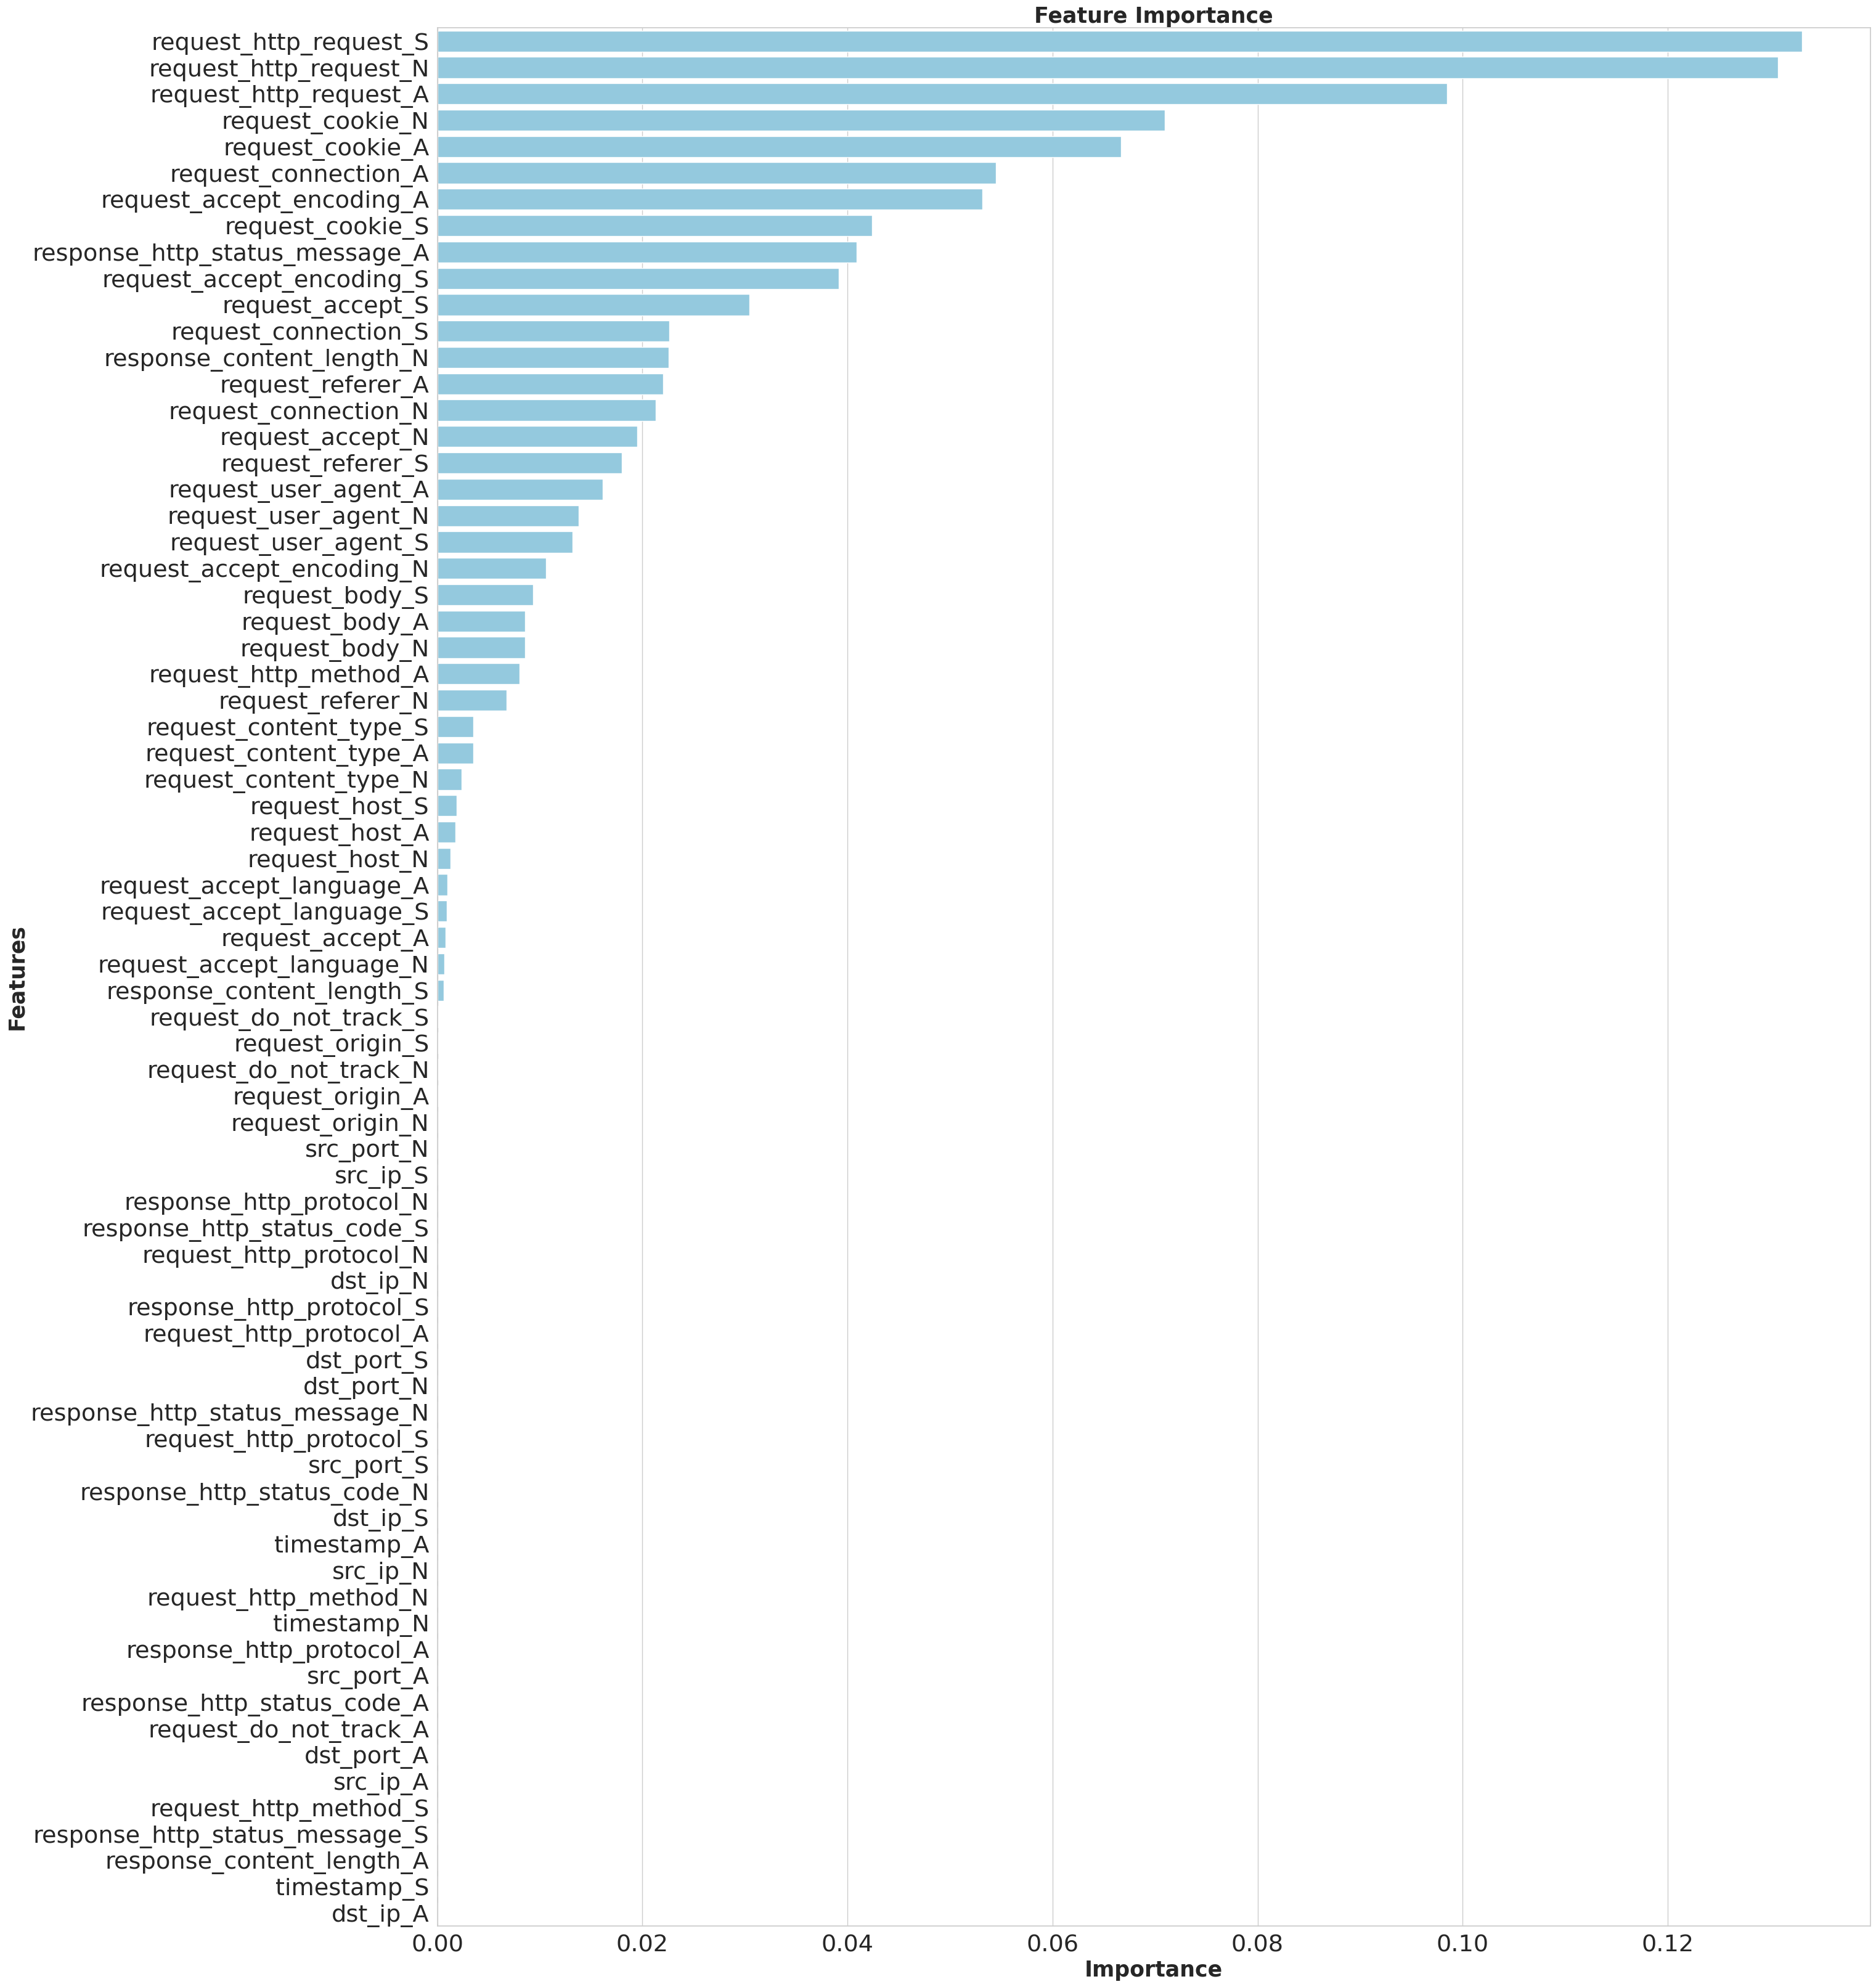

None

,Features,Gini-Importance
0,request_http_request_S,0.133110
1,request_http_request_N,0.130784
2,request_http_request_A,0.098454
3,request_cookie_N,0.070943
4,request_cookie_A,0.066655
...,...,...
67,request_http_method_S,0.000000
68,response_http_status_message_S,0.000000
69,response_content_length_A,0.000000
70,timestamp_S,0.000000


In [ ]:
import seaborn as sns
feats = {}
for feature, importance in zip(spis_column_merged[:72], clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 2.5)
fig, ax = plt.subplots()
fig.set_size_inches(30,40)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [ ]:
# Модель XGBoost
xgb_estimator = xgb.XGBClassifier()
multilabel_model = MultiOutputClassifier(xgb_estimator)
multilabel_model.fit(X_train_scaled, Y_train)
xgb_clf_preds = multilabel_model.predict(X_test_scaled)

In [ ]:
print(classification_report(Y_test, xgb_clf_preds, target_names = targ_names_merged))

                                        precision    recall  f1-score   support

                          000 - Normal       0.96      0.95      0.95    184124
           272 - Protocol Manipulation       0.94      0.55      0.70      3135
                  242 - Code Injection       0.99      0.97      0.98      5552
             88 - OS Command Injection       0.94      0.83      0.88      2565
                  126 - Path Traversal       0.98      0.92      0.95      7190
                    66 - SQL Injection       0.94      0.92      0.93     87743
 16 - Dictionary-based Password Attack       1.00      0.99      1.00       649
310 - Scanning for Vulnerable Software       1.00      1.00      1.00       929
         153 - Input Data Manipulation       0.99      0.98      0.99       775
             274 - HTTP Verb Tampering       0.99      0.99      0.99      1910
         194 - Fake the Source of Data       0.90      0.85      0.88     19528
          34 - HTTP Response Splitting 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_test, xgb_clf_preds))

Accuracy: 0.9177713573532744
